Compare the accuracies in different machine learning methods -- RF, LDA

In [1]:
from importlib.metadata import version

In [18]:
version('scipy')

'1.6.2'

In [16]:
from platform import python_version

print(python_version())

3.8.10


In [ ]:
import pickle
from matplotlib import pyplot as plt

In [ ]:
import os

## ClassyFire Classes

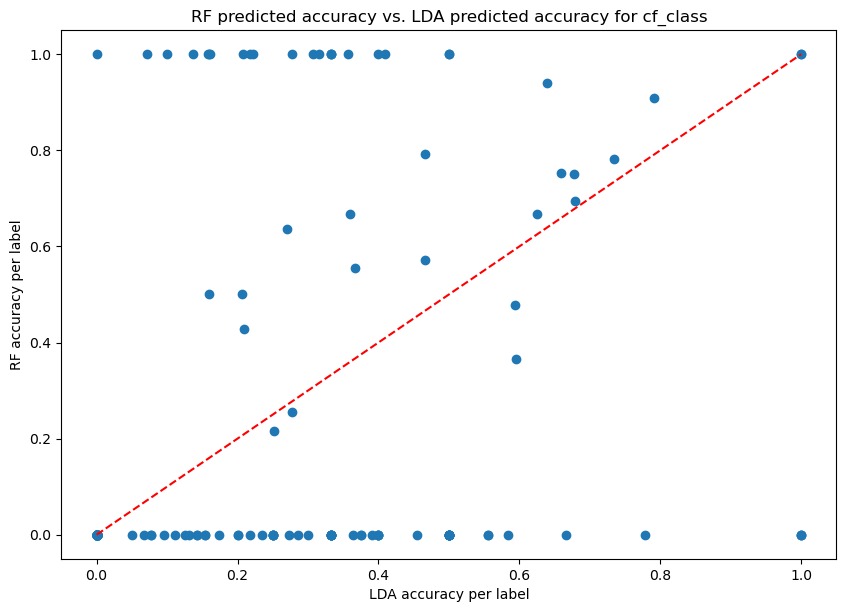

In [15]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_cf_class_lda_min4.pickle', 'rb') as f:
    lda_class_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_cf_class_randomforest_min4.pickle', 'rb') as f:
    rf_class_accuracy = pickle.load(f)
data_type = 'cf_class'    
save_path = '/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_accuracy_randomforest_vs_lda_cf_class.svg'
x= lda_class_accuracy['accuracy']
y= rf_class_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)
plt.plot((0, 1), "r--")
plt.title(f'RF predicted accuracy vs. LDA predicted accuracy for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

In [6]:
list(lda_class_accuracy['labels']) == list(rf_class_accuracy['labels'])

True

In [16]:
labels=list(lda_class_accuracy['labels'])
lda_acc = list(lda_class_accuracy['accuracy'])
rf_acc=list(rf_class_accuracy['accuracy'])

In [11]:
groupsize=[]
acc=[]
for i,v in enumerate(labels):
    if rf_acc[i]==0 and lda_acc[i] != 0:
        groupsize.append(lda_class_accuracy['group_size'][i])
        acc.append(lda_acc[i])
        print(v,lda_acc[i], lda_class_accuracy['group_size'][i])

2-arylbenzofuran flavonoids 0.07692307692307693 42
Amaryllidaceae alkaloids 0.25 16
Angucyclines 0.14285714285714285 9
Anthracenes 0.15384615384615385 93
Arylnaphthalene lignans 1.0 6
Aurone flavonoids 0.5 26
Azaphilones 0.3333333333333333 29
Benzazepines 0.45454545454545453 51
Benzimidazoles 0.3333333333333333 43
Benzodiazepines 0.15384615384615385 49
Benzofurans 0.5 43
Benzothiazines 0.5833333333333334 43
Benzotriazoles 0.2 13
Benzoxazepines 0.3333333333333333 5
Benzoxazines 0.5 17
Cytochalasans 0.36363636363636365 16
Depsides and depsidones 0.3333333333333333 56
Diazanaphthalenes 0.09523809523809523 105
Dibenzocycloheptenes 0.375 13
Dihydrofurans 0.14285714285714285 25
Eburnan-type alkaloids 0.5 5
Ergoline and derivatives 0.3333333333333333 23
Furanoid lignans 0.4 32
Hydroxy acids and derivatives 0.07692307692307693 44
Imidazopyrimidines 0.21739130434782608 81
Indolizidines 0.3333333333333333 8
Isocoumarins and derivatives 0.4 30
Isoquinolines and derivatives 0.06666666666666667 54


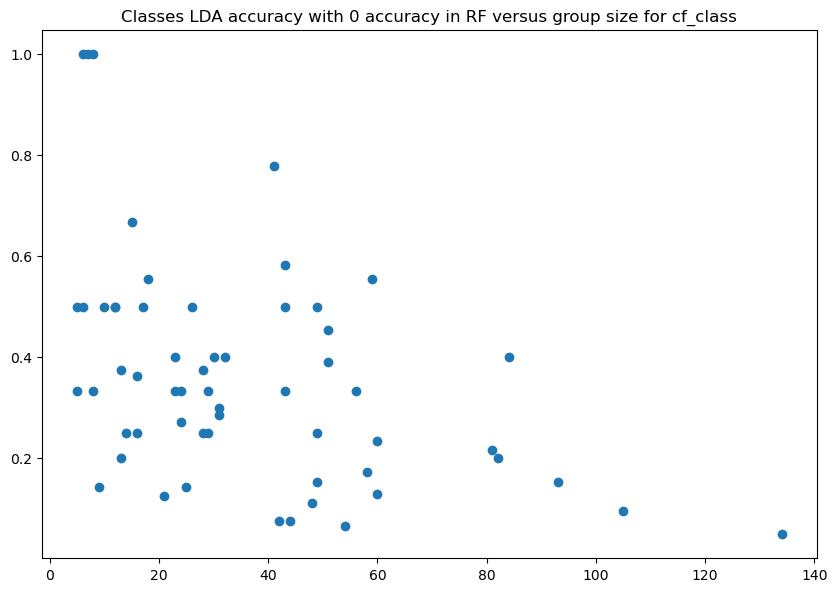

In [13]:
plt.scatter(groupsize,acc)
plt.title(f'Classes LDA accuracy with 0 accuracy in RF versus group size for {data_type}')
plt.show()

In [18]:
groupsize=[]
acc_all_rf=[]
acc_all_lda=[]
for i,v in enumerate(labels):
    if rf_acc[i]!=0 and lda_acc[i] != 0:
        groupsize.append(lda_class_accuracy['group_size'][i])
        acc_all_rf.append(rf_acc[i])
        acc_all_lda.append(lda_acc[i])
        print(v,lda_acc[i], rf_acc[i], lda_class_accuracy['group_size'][i])

Aporphines 0.625 0.6666666666666666 56
Benzene and substituted derivatives 0.2516025641025641 0.21604938271604937 1355
Benzodioxoles 0.3076923076923077 1.0 40
Benzopyrans 0.358974358974359 0.6666666666666666 271
Carboxylic acids and derivatives 0.27786032689450224 0.2547348484848485 1583
Cinchona alkaloids 1.0 1.0 12
Cinnamic acids and derivatives 0.3673469387755102 0.5555555555555556 173
Coumarins and derivatives 0.6777777777777778 0.75 471
Diarylheptanoids 0.16129032258064516 1.0 52
Diazinanes 0.4 1.0 76
Diazines 0.1 1.0 70
Fatty Acyls 0.4666666666666667 0.7916666666666666 566
Flavonoids 0.593939393939394 0.4779116465863454 780
Glycerolipids 0.7906976744186046 0.9090909090909091 180
Glycerophospholipids 0.734375 0.78125 308
Harmala alkaloids 0.3157894736842105 1.0 62
Ibogan-type alkaloids 0.3333333333333333 1.0 14
Indoles and derivatives 0.2698412698412698 0.6363636363636364 376
Isoflavonoids 0.4666666666666667 0.5714285714285714 247
Isoindoles and derivatives 0.07142857142857142 1.0

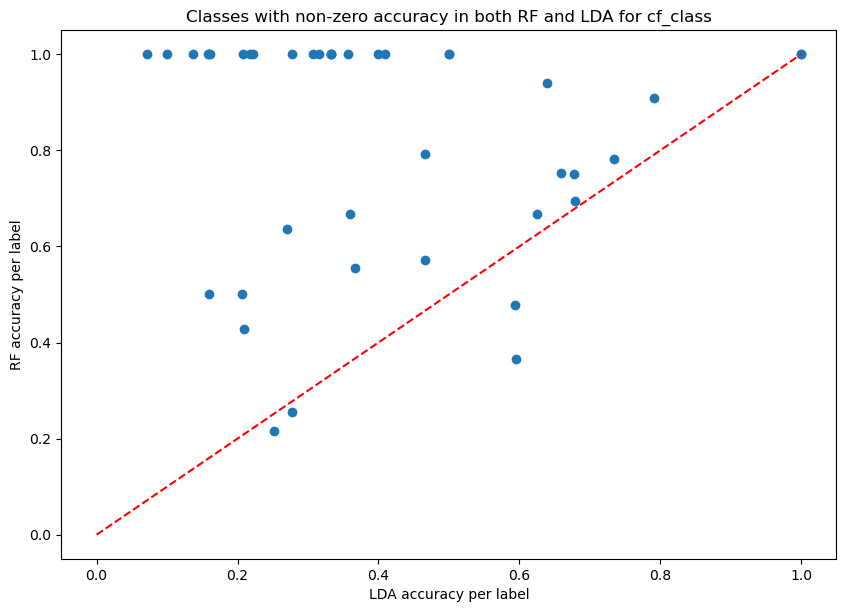

In [21]:
plt.scatter(acc_all_lda,acc_all_rf)
plt.plot((0, 1), "r--")
plt.title(f'Classes with non-zero accuracy in both RF and LDA for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
plt.show()

In [10]:
for i,v in enumerate(labels):
    if rf_acc[i]!=0 and lda_acc[i] == 0:
        print(v,rf_acc[i], lda_class_accuracy['group_size'][i])

Oxanes 1.0 9


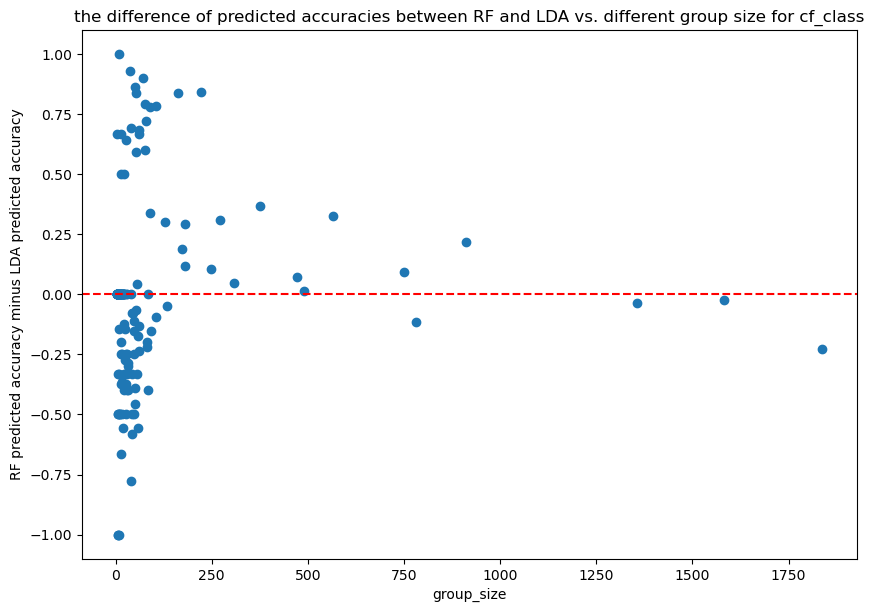

In [23]:
# The difference between lda and rf per label
save_path='/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_diff_accuracy_randomforest__lda_vs_groupsize_cf_class.svg'


group_size = rf_class_accuracy['group_size']
index_orderedby_size = [i[0] for i in sorted(enumerate(group_size), key=lambda k: k[1])]
group_size_ordered = [group_size[i] for i in index_orderedby_size]
accu_lda=lda_class_accuracy['accuracy']
accu_lda_ordered = [accu_lda[i] for i in index_orderedby_size]
accu_rf= rf_class_accuracy['accuracy']
accu_rf_ordered = [accu_rf[i] for i in index_orderedby_size]
diff_per_label = [(accu_rf_ordered[i]-accu_lda_ordered[i]) for i in range(len(accu_rf_ordered))]
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(group_size_ordered,diff_per_label)
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f'the difference of predicted accuracies between RF and LDA vs. different group size for {data_type}')
plt.xlabel('group_size')
plt.ylabel('RF predicted accuracy minus LDA predicted accuracy')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

## ClassyFire Superclasses

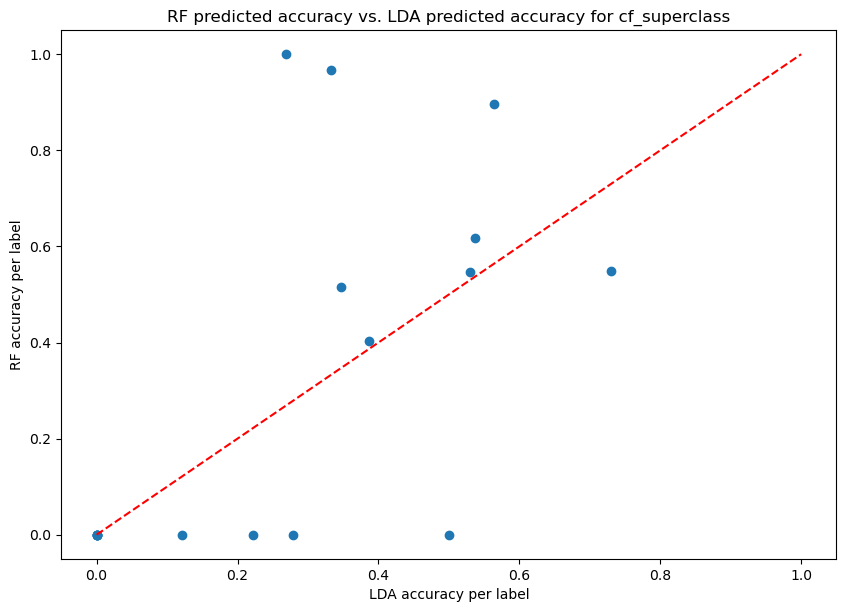

In [5]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_cf_superclass_lda_min4.pickle', 'rb') as f:
    lda_class_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_cf_superclass_randomforest_min4.pickle', 'rb') as f:
    rf_class_accuracy = pickle.load(f)
data_type = 'cf_superclass'    
save_path = '/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_accuracy_randomforest_vs_lda_cf_superclass.svg'
x= lda_class_accuracy['accuracy']
y= rf_class_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)
plt.plot((0, 1), "r--")
plt.title(f'RF predicted accuracy vs. LDA predicted accuracy for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

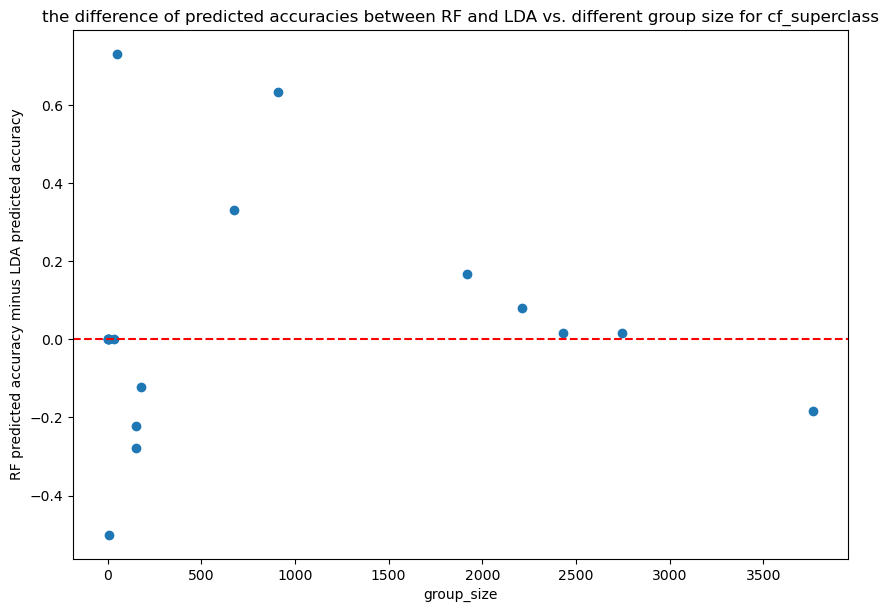

In [25]:
# The difference between lda and rf per label
save_path='/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_diff_accuracy_randomforest__lda_vs_groupsize_cf_superclass.svg'
group_size = rf_class_accuracy['group_size']
index_orderedby_size = [i[0] for i in sorted(enumerate(group_size), key=lambda k: k[1])]
group_size_ordered = [group_size[i] for i in index_orderedby_size]
accu_lda=lda_class_accuracy['accuracy']
accu_lda_ordered = [accu_lda[i] for i in index_orderedby_size]
accu_rf= rf_class_accuracy['accuracy']
accu_rf_ordered = [accu_rf[i] for i in index_orderedby_size]
diff_per_label = [(accu_rf_ordered[i]-accu_lda_ordered[i]) for i in range(len(accu_rf_ordered))]
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(group_size_ordered,diff_per_label)
plt.axhline(y=0, color='r', linestyle='--')

plt.title(f'the difference of predicted accuracies between RF and LDA vs. different group size for {data_type}')
plt.xlabel('group_size')
plt.ylabel('RF predicted accuracy minus LDA predicted accuracy')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

#### Find the labels with non-zero accuracy in lda but 0 in randomforest

In [6]:
labels=list(lda_class_accuracy['labels'])
lda_acc = list(lda_class_accuracy['accuracy'])
rf_acc=list(rf_class_accuracy['accuracy'])

In [7]:
groupsize=[]
acc=[]
for i,v in enumerate(labels):
    if rf_acc[i]==0 and lda_acc[i] != 0:
        groupsize.append(lda_class_accuracy['group_size'][i])
        acc.append(lda_acc[i])
        print(v,lda_acc[i], lda_class_accuracy['group_size'][i])

Hydrocarbon derivatives 0.5 10
Lignans, neolignans and related compounds 0.2222222222222222 152
Nucleosides, nucleotides, and analogues 0.27906976744186046 154
Organic nitrogen compounds 0.12121212121212122 180


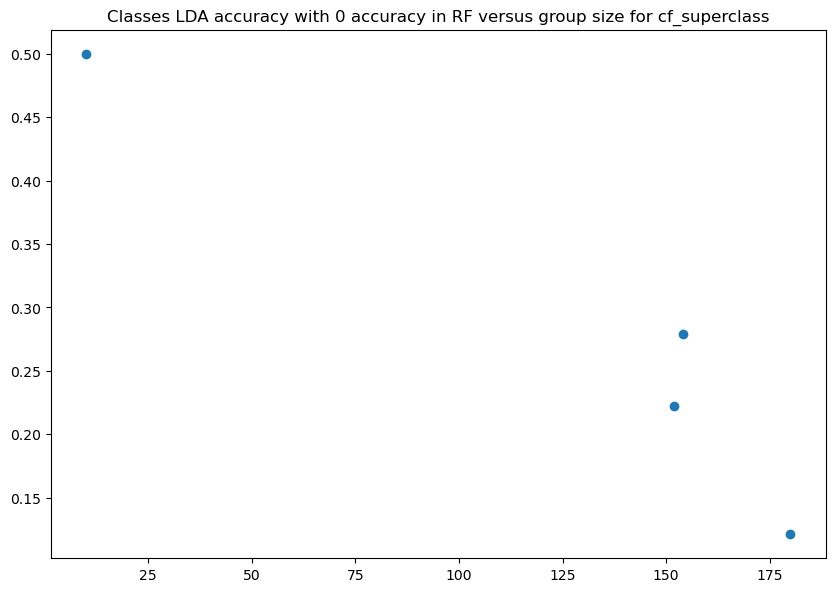

In [8]:
plt.scatter(groupsize,acc)
plt.title(f'Classes LDA accuracy with 0 accuracy in RF versus group size for {data_type}')
plt.show()

In [9]:
for i,v in enumerate(labels):
    if rf_acc[i]!=0 and lda_acc[i] == 0:
        print(v,rf_acc[i], lda_class_accuracy['group_size'][i])

## ClassyFire Subclasses

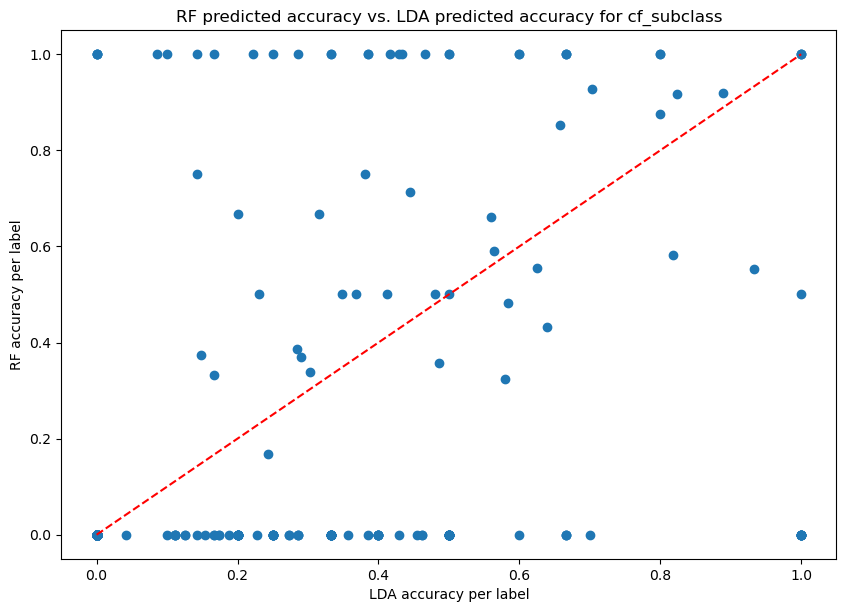

In [10]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_cf_subclass_lda_min4.pickle', 'rb') as f:
    lda_class_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_cf_subclass_randomforest_min4.pickle', 'rb') as f:
    rf_class_accuracy = pickle.load(f)
data_type = 'cf_subclass'    
save_path = '/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_accuracy_randomforest_vs_lda_cf_subclass.svg'    
x= lda_class_accuracy['accuracy']
y= rf_class_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)
plt.plot((0, 1), "r--")
plt.title(f'RF predicted accuracy vs. LDA predicted accuracy for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

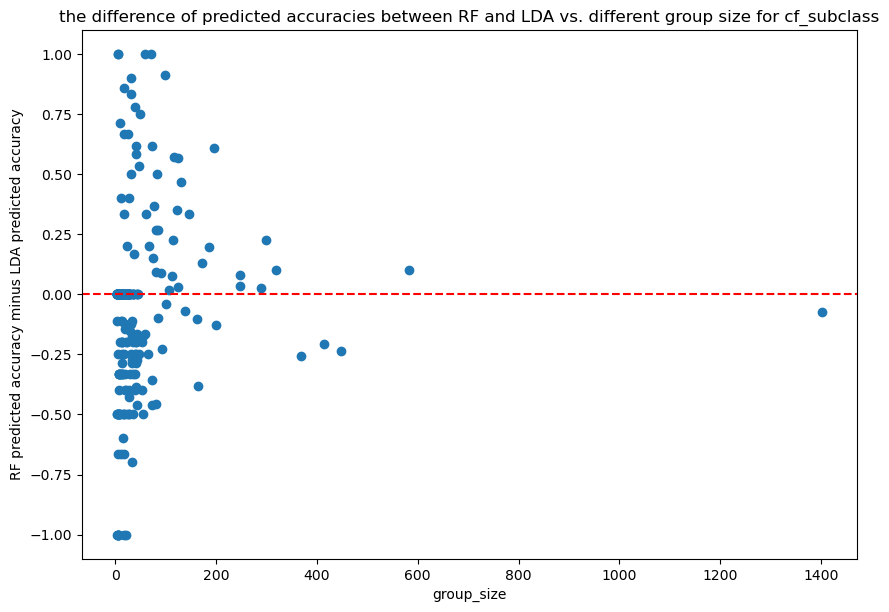

In [27]:
# The difference between lda and rf per label
save_path='/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_diff_accuracy_randomforest__lda_vs_groupsize_cf_subclass.svg'
group_size = rf_class_accuracy['group_size']
index_orderedby_size = [i[0] for i in sorted(enumerate(group_size), key=lambda k: k[1])]
group_size_ordered = [group_size[i] for i in index_orderedby_size]
accu_lda=lda_class_accuracy['accuracy']
accu_lda_ordered = [accu_lda[i] for i in index_orderedby_size]
accu_rf= rf_class_accuracy['accuracy']
accu_rf_ordered = [accu_rf[i] for i in index_orderedby_size]
diff_per_label = [(accu_rf_ordered[i]-accu_lda_ordered[i]) for i in range(len(accu_rf_ordered))]
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(group_size_ordered,diff_per_label)
plt.axhline(y=0, color='r', linestyle='--')

plt.title(f'the difference of predicted accuracies between RF and LDA vs. different group size for {data_type}')
plt.xlabel('group_size')
plt.ylabel('RF predicted accuracy minus LDA predicted accuracy')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

#### Find the labels with non-zero accuracy in lda but 0 in randomforest

In [11]:
labels=list(lda_class_accuracy['labels'])
lda_acc = list(lda_class_accuracy['accuracy'])
rf_acc=list(rf_class_accuracy['accuracy'])

In [12]:
groupsize=[]
acc=[]
for i,v in enumerate(labels):
    if rf_acc[i]==0 and lda_acc[i] != 0:
        groupsize.append(lda_class_accuracy['group_size'][i])
        acc.append(lda_acc[i])
        print(v,lda_acc[i], lda_class_accuracy['group_size'][i])

1,3,5-triazines 0.5 17
1,4-benzodiazepines 0.3333333333333333 39
1-benzothiopyrans 1.0 6
2-benzimidazolylcarbamic acid esters 0.3333333333333333 7
Alpha hydroxy acids and derivatives 0.25 5
Aminoxides 0.5 4
Androstane steroids 0.25 41
Anilides 0.041666666666666664 101
Anisoles 0.2 42
Aspochalasins 0.5 9
Benzenesulfonic acids and derivatives 0.3333333333333333 13
Benzofuranones 0.5 10
Benzophenones 0.2727272727272727 43
Benzoquinolines 0.5 28
Benzothiadiazines 0.3333333333333333 9
Benzoyl derivatives 0.3333333333333333 14
Benzylethers 0.5 15
Benzylisoquinolines 0.42857142857142855 28
Beta lactams 1.0 22
Biflavonoids and polyflavonoids 0.17391304347826086 33
Biphenyls and derivatives 0.38461538461538464 42
Carboxylic acid derivatives 0.25 39
Chalcones and dihydrochalcones 0.35714285714285715 74
Cholestane steroids 0.3333333333333333 19
Cinnamic acid amides 0.3333333333333333 8
Coumarin glycosides 0.1875 37
Cucurbitacins 0.2 13
Cyclic purine nucleotides 1.0 5
Cycloartanols and derivatives

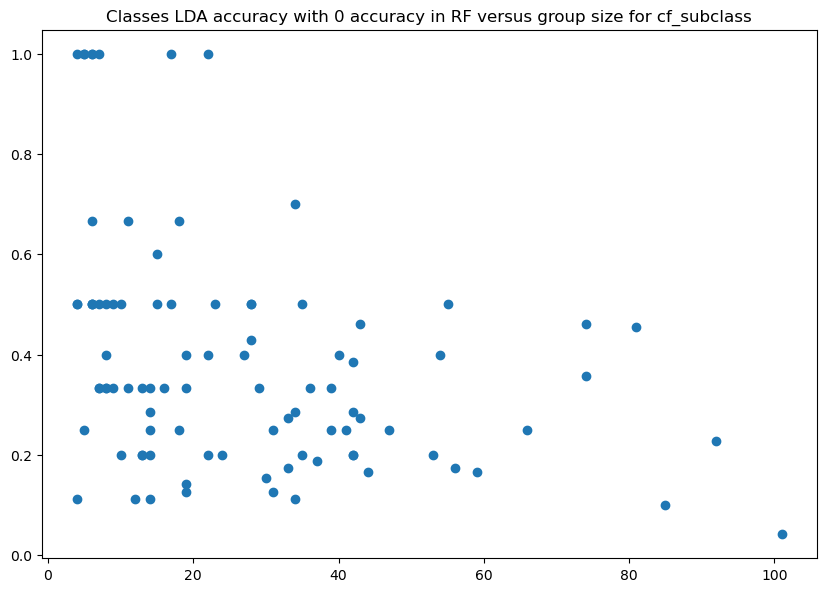

In [13]:
plt.scatter(groupsize,acc)
plt.title(f'Classes LDA accuracy with 0 accuracy in RF versus group size for {data_type}')
plt.show()

In [14]:
for i,v in enumerate(labels):
    if rf_acc[i]!=0 and lda_acc[i] == 0:
        print(v,rf_acc[i], lda_class_accuracy['group_size'][i])

Acetophenones 1.0 6
Alcohols and polyols 1.0 71
Fatty amides 1.0 60
Isoindoles 1.0 6


## NPClassifier Classes

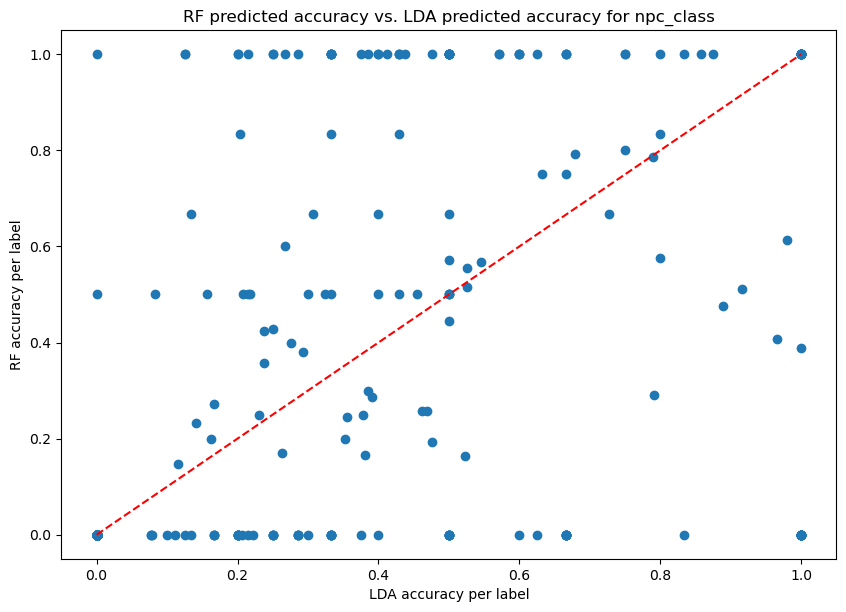

In [28]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_npc_class_lda_min4.pickle', 'rb') as f:
    lda_class_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_npc_class_randomforest_min4.pickle', 'rb') as f:
    rf_class_accuracy = pickle.load(f)
data_type = 'npc_class'    
save_path = '/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_accuracy_randomforest_vs_lda_npc_class.svg' 
x= lda_class_accuracy['accuracy']
y= rf_class_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)
plt.plot((0, 1), "r--")
plt.title(f'RF predicted accuracy vs. LDA predicted accuracy for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

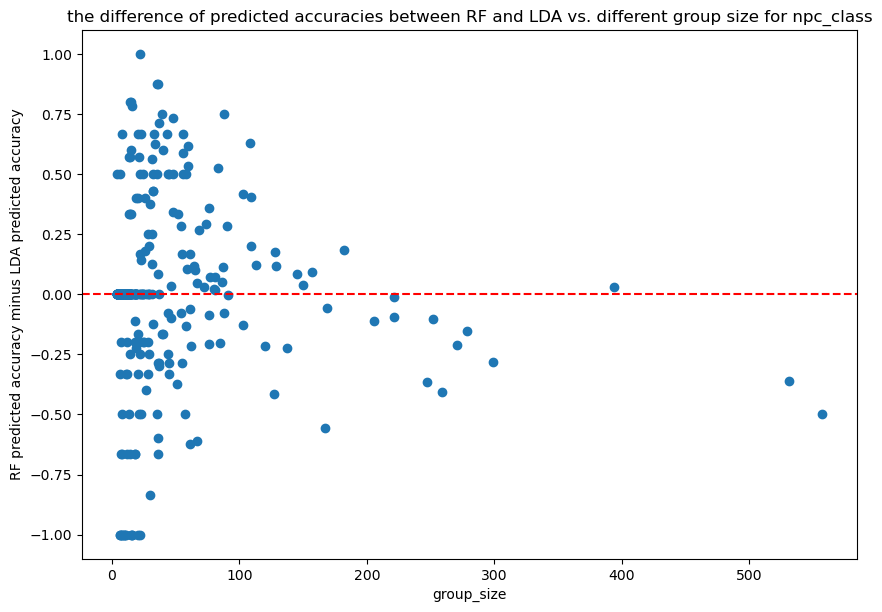

In [29]:
# The difference between lda and rf per label
save_path='/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_diff_accuracy_randomforest__lda_vs_groupsize_npc_class.svg'
group_size = rf_class_accuracy['group_size']
index_orderedby_size = [i[0] for i in sorted(enumerate(group_size), key=lambda k: k[1])]
group_size_ordered = [group_size[i] for i in index_orderedby_size]
accu_lda=lda_class_accuracy['accuracy']
accu_lda_ordered = [accu_lda[i] for i in index_orderedby_size]
accu_rf= rf_class_accuracy['accuracy']
accu_rf_ordered = [accu_rf[i] for i in index_orderedby_size]
diff_per_label = [(accu_rf_ordered[i]-accu_lda_ordered[i]) for i in range(len(accu_rf_ordered))]
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(group_size_ordered,diff_per_label)
plt.axhline(y=0, color='r', linestyle='--')

plt.title(f'the difference of predicted accuracies between RF and LDA vs. different group size for {data_type}')
plt.xlabel('group_size')
plt.ylabel('RF predicted accuracy minus LDA predicted accuracy')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

## NPClassifier Superclasses

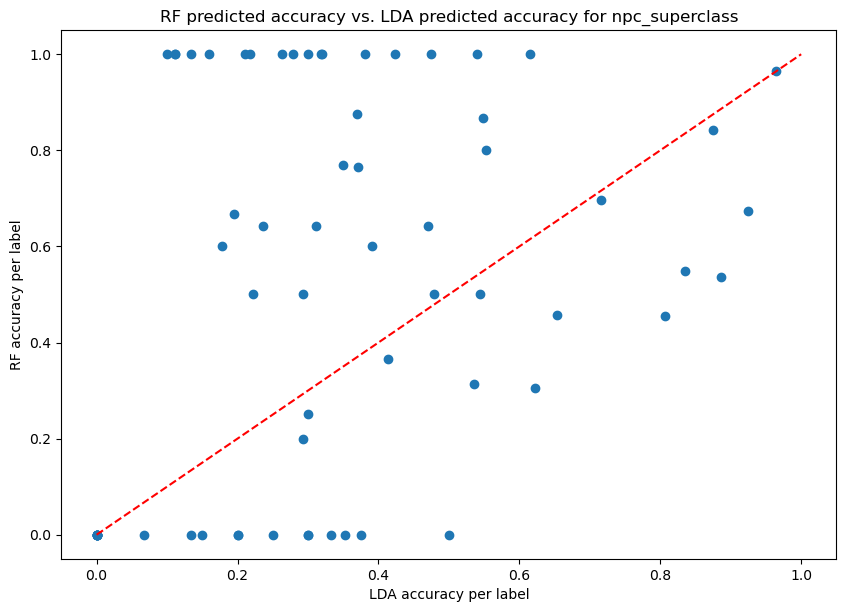

In [30]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_npc_superclass_lda_min4.pickle', 'rb') as f:
    lda_class_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_npc_superclass_randomforest_min4.pickle', 'rb') as f:
    rf_class_accuracy = pickle.load(f)
data_type = 'npc_superclass'    
save_path = '/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_accuracy_randomforest_vs_lda_npc_superclass.svg'   
x= lda_class_accuracy['accuracy']
y= rf_class_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)
plt.plot((0, 1), "r--")
plt.title(f'RF predicted accuracy vs. LDA predicted accuracy for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

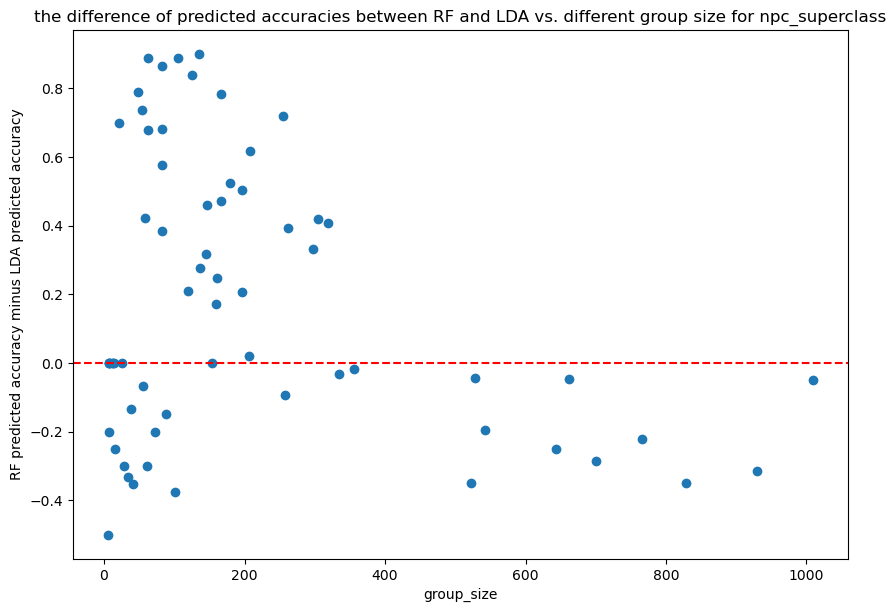

In [31]:
# The difference between lda and rf per label
save_path='/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_diff_accuracy_randomforest__lda_vs_groupsize_npc_superclass.svg'
group_size = rf_class_accuracy['group_size']
index_orderedby_size = [i[0] for i in sorted(enumerate(group_size), key=lambda k: k[1])]
group_size_ordered = [group_size[i] for i in index_orderedby_size]
accu_lda=lda_class_accuracy['accuracy']
accu_lda_ordered = [accu_lda[i] for i in index_orderedby_size]
accu_rf= rf_class_accuracy['accuracy']
accu_rf_ordered = [accu_rf[i] for i in index_orderedby_size]
diff_per_label = [(accu_rf_ordered[i]-accu_lda_ordered[i]) for i in range(len(accu_rf_ordered))]
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(group_size_ordered,diff_per_label)
plt.axhline(y=0, color='r', linestyle='--')

plt.title(f'the difference of predicted accuracies between RF and LDA vs. different group size for {data_type}')
plt.xlabel('group_size')
plt.ylabel('RF predicted accuracy minus LDA predicted accuracy')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

## NPClassifier Pathways

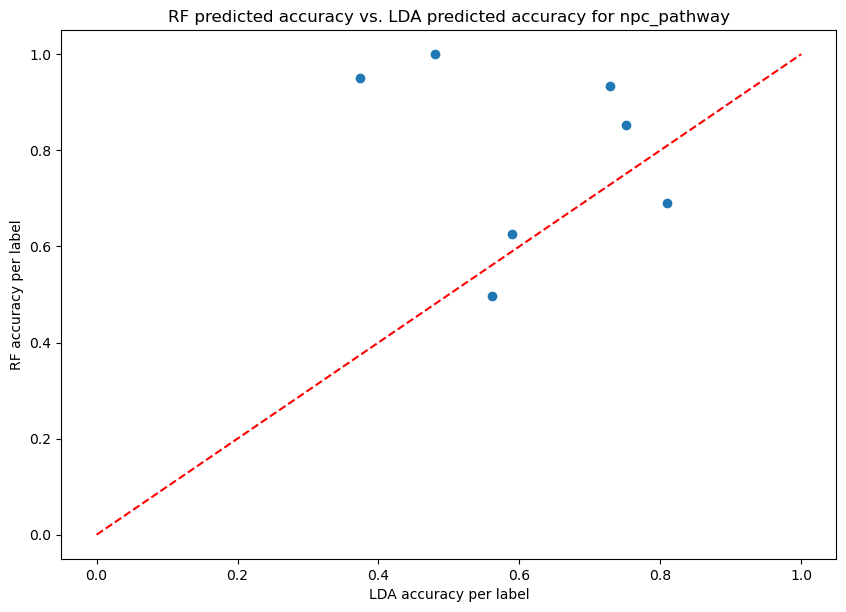

In [32]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_npc_pathway_lda_min4.pickle', 'rb') as f:
    lda_class_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label2/accuracy_per_label_npc_pathway_randomforest_min4.pickle', 'rb') as f:
    rf_class_accuracy = pickle.load(f)
data_type = 'npc_pathway'   
save_path = '/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_accuracy_randomforest_vs_lda_npc_pathway.svg'  
x= lda_class_accuracy['accuracy']
y= rf_class_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)
plt.plot((0, 1), "r--")
plt.title(f'RF predicted accuracy vs. LDA predicted accuracy for {data_type}')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

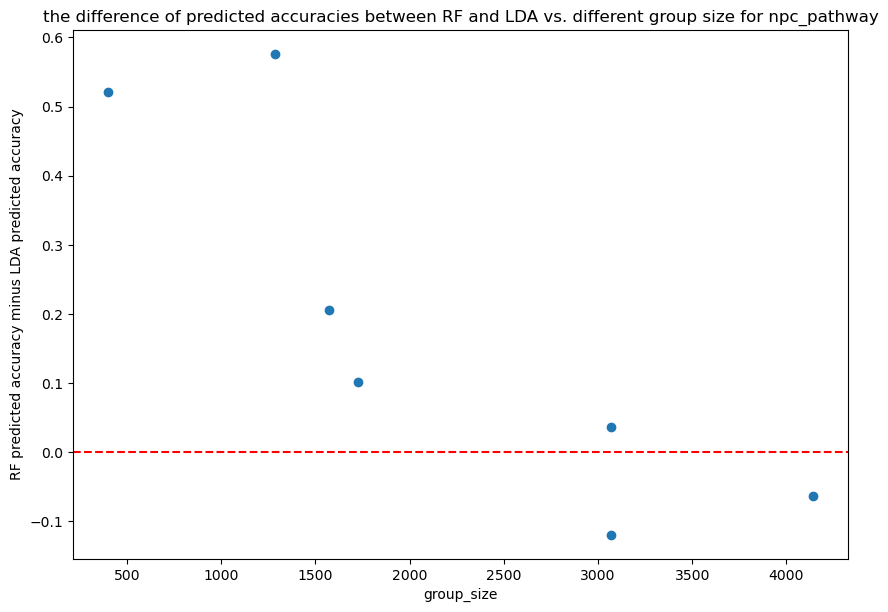

In [33]:
# The difference between lda and rf per label
save_path='/mnt/scratch/ding013/MS2ChemClass/scatter_accuracy_vs_groupsize/dot_diff_accuracy_randomforest__lda_vs_groupsize_npc_pathway.svg'
group_size = rf_class_accuracy['group_size']
index_orderedby_size = [i[0] for i in sorted(enumerate(group_size), key=lambda k: k[1])]
group_size_ordered = [group_size[i] for i in index_orderedby_size]
accu_lda=lda_class_accuracy['accuracy']
accu_lda_ordered = [accu_lda[i] for i in index_orderedby_size]
accu_rf= rf_class_accuracy['accuracy']
accu_rf_ordered = [accu_rf[i] for i in index_orderedby_size]
diff_per_label = [(accu_rf_ordered[i]-accu_lda_ordered[i]) for i in range(len(accu_rf_ordered))]
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(group_size_ordered,diff_per_label)
plt.axhline(y=0, color='r', linestyle='--')

plt.title(f'the difference of predicted accuracies between RF and LDA vs. different group size for {data_type}')
plt.xlabel('group_size')
plt.ylabel('RF predicted accuracy minus LDA predicted accuracy')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))
plt.savefig(save_path)
plt.show()

## For other groups

In [34]:
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label/NPC_accuracy_LDA_Class_allgroups.pickle', 'rb') as f:
    lda_class_allgroup_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label/NPC_accuracy_LDA_Class_30groups.pickle', 'rb') as f:
    lda_class_30group_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label/NPC_accuracy_RF_Class_allgroups.pickle', 'rb') as f:
    rf_class_allgroup_accuracy = pickle.load(f)
with open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label/NPC_accuracy_RF_Class_30groups.pickle', 'rb') as f:
    rf_class_30group_accuracy = pickle.load(f)

In [35]:
print(lda_class_30group_accuracy['labels'])
print(rf_class_30group_accuracy['labels'])

['Aminoacids', 'Anthraquinones and anthrones', 'Carboline alkaloids', 'Carotenoids (C40', 'Chalcones', 'Cholane steroids', 'Cinnamic acids and derivatives', 'Corynanthe type', 'Cyclic peptides', 'Dipeptides', 'Flavanones', 'Flavones', 'Flavonols', 'Furocoumarins', 'Glycerophosphocholines', 'Iridoids monoterpenoids', 'Isoflavones', 'Isoquinoline alkaloids', 'Linear peptides', 'N-acyl amines', 'Oleanane triterpenoids', 'Phenylalanine-derived alkaloids', 'Piperidine alkaloids', 'Pregnane steroids', 'Pyridine alkaloids', 'Simple coumarins', 'Simple indole alkaloids', 'Simple phenolic acids', 'Triacylglycerols', 'Tripeptides']
['Aminoacids', 'Anthraquinones and anthrones', 'Carboline alkaloids', 'Carotenoids (C40', 'Chalcones', 'Cholane steroids', 'Cinnamic acids and derivatives', 'Corynanthe type', 'Cyclic peptides', 'Dipeptides', 'Flavanones', 'Flavones', 'Flavonols', 'Furocoumarins', 'Glycerophosphocholines', 'Iridoids monoterpenoids', 'Isoflavones', 'Isoquinoline alkaloids', 'Linear pep

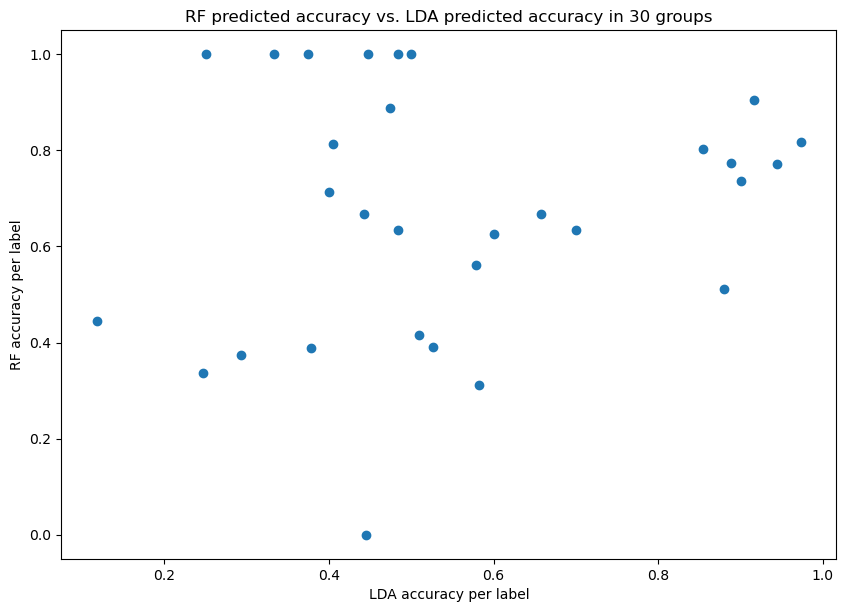

In [36]:
# all groups
x= lda_class_30group_accuracy['accuracy']
y= rf_class_30group_accuracy['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)

plt.title('RF predicted accuracy vs. LDA predicted accuracy in 30 groups')
plt.xlabel('LDA accuracy per label')
plt.ylabel('RF accuracy per label')
#for i,txt in enumerate(lda_class_accuracy['labels']):
#    if y[i] < 0.1 and x[i] >0.9:
#        plt.annotate(txt,(x[i],y[i]))
#    if y[i] > 0.9 and x[i] < 0.1:
#        plt.annotate(txt,(x[i],y[i]))

plt.show()